In [28]:
import numpy as np
import scipy.stats
import scipy.interpolate
import pylab as plt
from scipy.optimize import curve_fit
plt.rcParams['figure.figsize'] = [5, 5]
from astroML.datasets import fetch_dr7_quasar
from tqdm import tqdm

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

# Rejection

100%|██████████| 100000/100000 [00:08<00:00, 11140.75it/s]


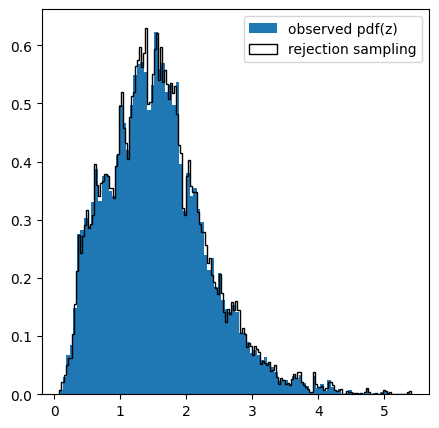

In [29]:
N=100000
counts, bins, bars = plt.hist(z, bins = int(np.sqrt(len(z))), density = True, label = 'observed pdf(z)')
x = np.random.uniform(0,max(bins),N)
y = np.random.uniform(0,max(counts),N) #generating points randomly
goodpoints = []

for i in tqdm(range(N)):
    for j in range(len(counts)):
        if bins[j] < x[i] < bins[j+1]:
            if y[i] <= counts[j]:
                goodpoints.append(x[i]) #selecting the points within the histogram

plt.hist(goodpoints,bins = int(np.sqrt(len(goodpoints))), density = True, histtype='step',color='black', label = 'rejection sampling');
plt.legend()

# Inverse transform sampling

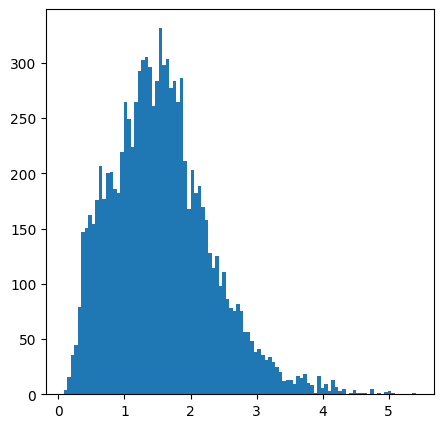

Text(0.5, 1.0, 'CDF')

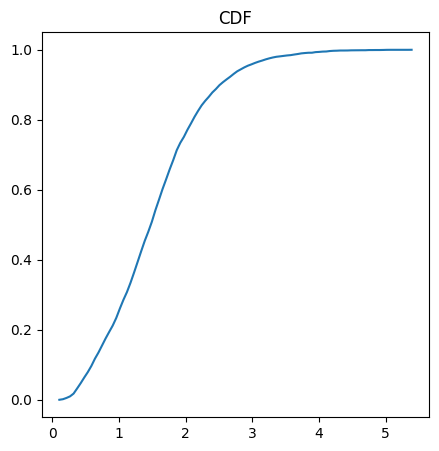

In [24]:
counts, bins, bars = plt.hist(z, bins = int(np.sqrt(len(z))))

x_data = (bins[1:] + bins[:-1]) / 2

cdf_norm = np.cumsum(counts) / np.sum(counts) #comulative density function

plt.show()
plt.plot(x_data, cdf_norm)
plt.title('CDF')

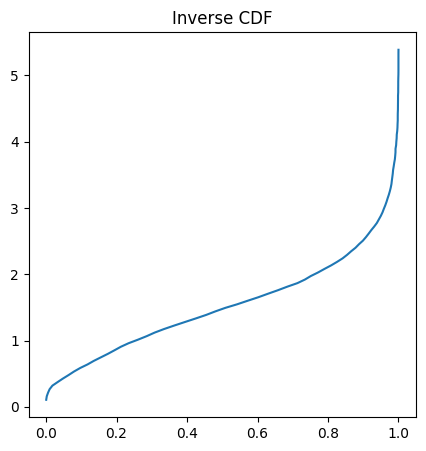

In [25]:
plt.plot(cdf_norm, x_data)
plt.title('Inverse CDF')
plt.show()

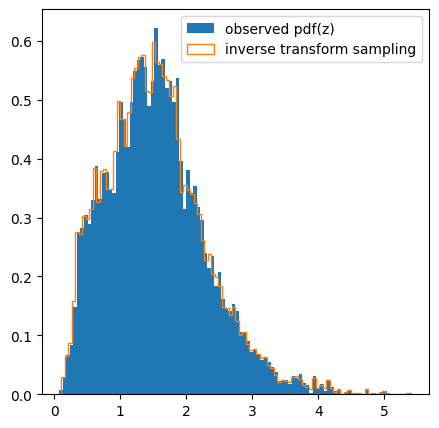

In [26]:
fit = scipy.interpolate.interp1d(cdf_norm, x_data)

x_s = fit(np.random.uniform(min(cdf_norm),max(cdf_norm), N)) #sampling along the cdf

counts, bins, bars = plt.hist(z, bins = int(np.sqrt(len(z))), density=True, label = 'observed pdf(z)')
plt.hist(x_s, bins = int(np.sqrt(len(z))), density=True, histtype='step', label = 'inverse transform sampling')

plt.legend()
plt.show()

# KS test

In [32]:
print('Rejection sampling KS test = ' + str(scipy.stats.ks_2samp(z, goodpoints).statistic))
print('IT sampling KS test = ' + str(scipy.stats.ks_2samp(z, x_s).statistic))

Rejection sampling KS test = 0.0068297700956536644
IT sampling KS test = 0.019989999999999952


# Comparison with an assumed uniform distribution of quasars in comoving volume in the Universe

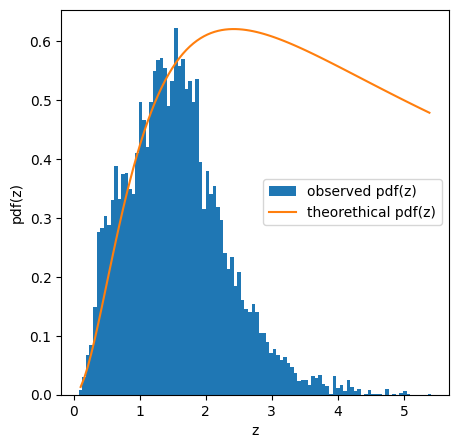

In [27]:
import astropy

cosmo = astropy.cosmology.Planck18

distr = cosmo.differential_comoving_volume(x_data).value
distr = distr/(sum(distr))

plt.hist(z, bins = 100, density = True, label = 'observed pdf(z)')
plt.plot(x_data, 50*distr, label = 'theorethical pdf(z)') # normalized by eye
plt.xlabel('z')
plt.ylabel('pdf(z)')
plt.legend()